# Study Player profile information

This notebook looks at the player game information on a per game level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("player_info_100k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

In [3]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [4]:
df.head()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profilestate,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid
0,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,...,1.0,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN
1,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,...,1.0,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN
2,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,...,1.0,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN
3,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,...,1.0,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN
4,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,...,1.0,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profilestate,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid
100076,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560637e+09,NaN,FI,NaN,Brunski,...,1.0,https://steamcommunity.com/id/brunski_/,Mongol Ricefarmer,76561198175700694,1.422124e+09,NaN,NaN,NaN,NaN,NaN
100077,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.498653e+09,NaN,NaN,NaN,CrazyMF,...,1.0,https://steamcommunity.com/id/vasmlim3/,Vasmlim,76561198055948279,1.325185e+09,NaN,NaN,NaN,NaN,NaN
100078,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560619e+09,NaN,JP,NaN,gomimap,...,1.0,https://steamcommunity.com/id/gomimap/,map,76561198169930253,1.419489e+09,NaN,NaN,NaN,NaN,NaN
100079,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560608e+09,26023.0,JP,12,UMAIBO[JPN],...,1.0,https://steamcommunity.com/profiles/7656119800...,kitty/GUY きちがい,76561198002434601,1.226191e+09,NaN,NaN,NaN,NaN,NaN
100080,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560293e+09,13377.0,DE,02,hammelion,...,1.0,https://steamcommunity.com/id/hammelion/,Mike,76561197993657300,1.193135e+09,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100081 entries, 0 to 100080
Data columns (total 23 columns):
avatar                      100080 non-null object
avatarfull                  100080 non-null object
avatarmedium                100080 non-null object
commentpermission           49276 non-null float64
communityvisibilitystate    100080 non-null float64
lastlogoff                  100011 non-null float64
loccityid                   24124 non-null float64
loccountrycode              67228 non-null object
locstatecode                41711 non-null object
personaname                 100075 non-null object
personastate                100080 non-null float64
personastateflags           88608 non-null float64
primaryclanid               88608 non-null float64
profilestate                99653 non-null float64
profileurl                  100080 non-null object
realname                    56886 non-null object
steamid                     100080 non-null object
timecreated           

In [7]:
list(df['avatar'].mode())

['https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/fe/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg']

In [8]:
df['costom_avatar'] = df['avatar'].map(lambda x: (x != 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/fe/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg')*1)

In [9]:
df.head()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar
0,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,...,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1
1,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,...,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1
2,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,...,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1
3,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,...,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1
4,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,...,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1


In [10]:
df = df.drop(['avatar','avatarfull','avatarmedium'],axis='columns')

In [11]:
df['commentpermission'] = df['commentpermission'].fillna(0)

In [12]:
df.head()

,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,...,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar
0,0.0,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1
1,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1
2,0.0,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1
3,0.0,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1
4,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1


In [13]:
df['isPublic'] = df['communityvisibilitystate'].map(lambda x: (x == 3)*1)
df['isFriendsOnly'] = df['communityvisibilitystate'].map(lambda x: (x == 2)*1)
df['isPrivate'] = df['communityvisibilitystate'].map(lambda x: (x == 1)*1)

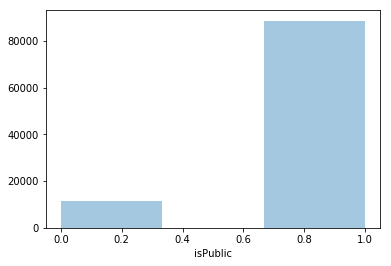

In [14]:
sns.distplot(df['isPublic'],kde=False,bins=3)

In [15]:
df = df.drop('communityvisibilitystate',axis='columns')

In [16]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,profilestate,...,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar,isPublic,isFriendsOnly,isPrivate
0,0.0,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,1.0,...,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,1.0,...,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
2,0.0,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,1.0,...,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
3,0.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,1.0,...,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,1.0,...,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0


In [17]:
df['lastlogoff_readable'] = pd.to_datetime(df['lastlogoff'], unit='s')

In [18]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,profilestate,...,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable
0,0.0,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2015-11-22 13:30:39
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-15 00:54:44
2,0.0,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-15 21:34:34
3,0.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-04-13 03:34:06
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-14 21:03:18


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100081 entries, 0 to 100080
Data columns (total 24 columns):
commentpermission      100081 non-null float64
lastlogoff             100011 non-null float64
loccityid              24124 non-null float64
loccountrycode         67228 non-null object
locstatecode           41711 non-null object
personaname            100075 non-null object
personastate           100080 non-null float64
personastateflags      88608 non-null float64
primaryclanid          88608 non-null float64
profilestate           99653 non-null float64
profileurl             100080 non-null object
realname               56886 non-null object
steamid                100080 non-null object
timecreated            88608 non-null float64
gameextrainfo          2084 non-null object
gameid                 2084 non-null float64
gameserverip           206 non-null object
gameserversteamid      204 non-null float64
lobbysteamid           206 non-null float64
costom_avatar          10

In [20]:
df = df.drop(['personastate','personastateflags','profileurl','gameextrainfo','gameid','gameserverip','gameserversteamid','lobbysteamid'],axis='columns')

In [21]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable
0,0.0,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44
2,0.0,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34
3,0.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18


In [22]:
df['timecreated_readable'] = pd.to_datetime(df['timecreated'], unit='s')

In [23]:
df = df[pd.to_datetime(df['timecreated'], unit='s') < churn_cutoff]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 100080
Data columns (total 17 columns):
commentpermission       88555 non-null float64
lastlogoff              88500 non-null float64
loccityid               24114 non-null float64
loccountrycode          67198 non-null object
locstatecode            41695 non-null object
personaname             88551 non-null object
primaryclanid           88555 non-null float64
profilestate            88142 non-null float64
realname                56858 non-null object
steamid                 88555 non-null object
timecreated             88555 non-null float64
costom_avatar           88555 non-null int64
isPublic                88555 non-null int64
isFriendsOnly           88555 non-null int64
isPrivate               88555 non-null int64
lastlogoff_readable     88500 non-null datetime64[ns]
timecreated_readable    88555 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(4), object(5)
memory usage: 12.2+ MB


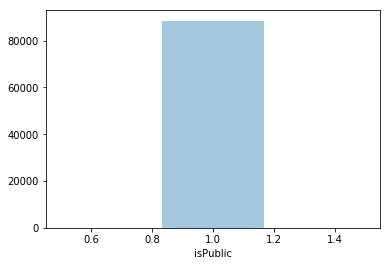

In [25]:
sns.distplot(df['isPublic'],kde=False,bins=3)

In [26]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable,timecreated_readable
0,0.0,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39,2015-06-04 11:16:51
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44,2011-09-30 20:03:45
2,0.0,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34,2011-04-17 17:05:56
3,0.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06,2007-07-04 02:37:15
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18,2010-05-25 13:08:00


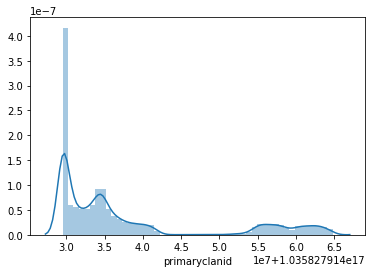

In [27]:
sns.distplot(df['primaryclanid'])

In [26]:
df['inClan'] = df['primaryclanid'].map(lambda x: 1 if x>1 else 0)

In [27]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable,timecreated_readable,inClan
0,0.0,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39,2015-06-04 11:16:51,1
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44,2011-09-30 20:03:45,1
2,0.0,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34,2011-04-17 17:05:56,1
3,0.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06,2007-07-04 02:37:15,1
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18,2010-05-25 13:08:00,1


In [28]:
df = df.drop('primaryclanid',axis='columns')

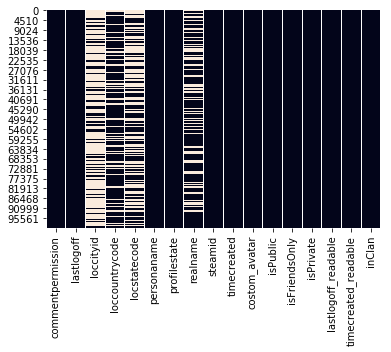

In [29]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False)

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/anaconda2/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


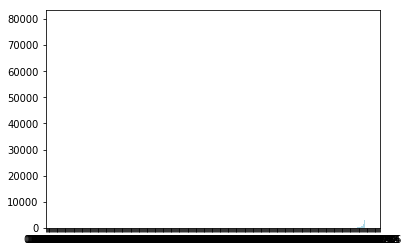

In [31]:
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df['lastlogoff_readable'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


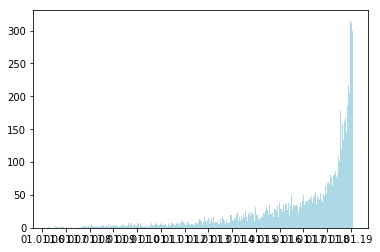

In [32]:
import datetime
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df[df['lastlogoff_readable'] < datetime.date(2019,1,31)]['lastlogoff_readable'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [33]:
df.to_csv('100k_clean_player_info.csv')

In [34]:
df['timecreated'].max()

1552404962.0

In [35]:
pd.to_datetime(df['timecreated'].max(),unit='s')

Timestamp('2019-03-12 15:36:02')

In [37]:
df.isPublic.nunique()

1